In [1]:
import numpy as np
import tensorflow as tf
import csv
import cv2
import matplotlib.pyplot as plt


In [2]:
arr=np.array([[[0,0,0],[0,0,0]],[[0,0,0],[0,0,0]]])
arr=arr.flatten()
arr[3:6]=1

print(len(arr))

12


In [3]:
def label_oneshot(label):
    new_label=[]
    for i in range(len(label)):
        arr=np.zeros((label[i][:,:,0].shape[0]*label[i][:,:,0].shape[1],37),np.uint64)
        flat_label=label[i][:,:,0].flatten()
        for x in range(len(flat_label)):
            arr[i,flat_label[i]]=1
        arr=np.reshape(arr,(label[i][:,:,0].shape[0],label[i][:,:,0].shape[1],37))
        new_label.append(arr)
    return new_label

In [4]:
def img_resize(img):
    for i in range(len(img)):
        img[i]=cv2.resize(img[i], None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    return img

In [5]:
train_label=[cv2.imread('data/train_labels/img13labels-'+str(i+1).zfill(6)+'.png') for i in range(1500)]#5285

In [6]:
train_image=[cv2.imread('data/train_images/img-'+str(i+1).zfill(6)+'.jpg') for i in range(1500)]#5285

In [7]:
test_image=[cv2.imread('data/test_images/img-'+str(i+1).zfill(6)+'.jpg') for i in range(500)]#5050

In [8]:
test_label=[cv2.imread('data/test_labels/img13labels-'+str(i+1).zfill(6)+'.png') for i in range(500)]#5050

In [9]:
train_image=img_resize(train_image)
train_label=img_resize(train_label)
test_label=img_resize(test_label)
test_image=img_resize(test_image)

In [10]:
print(train_label[0].shape)
print(test_label[0].shape)

(265, 365, 3)
(265, 365, 3)


In [11]:
new_test_label=label_oneshot(test_label)

In [12]:
print(new_test_label[0].shape)

(265, 365, 37)


In [13]:
new_train_label=label_oneshot(train_label)

In [14]:
print(len(new_train_label))

1500


In [15]:
learning_rate=0.0001
training_epochs=100
set=10
batch_size = 10
tf.reset_default_graph()
x=tf.placeholder(tf.float32,[None,265,365,3])
y=tf.placeholder(tf.float32, [None,265,365,37])

In [16]:
print(x)
print(len(train_image))

Tensor("Placeholder:0", shape=(?, 265, 365, 3), dtype=float32)
1500


In [17]:
w1_1=tf.get_variable("w1_1", shape=[5,5,3,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w1_2=tf.get_variable("w1_2", shape=[5,5,64,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w2_1=tf.get_variable("w2_1", shape=[5,5,64,128], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w2_2=tf.get_variable("w2_2", shape=[5,5,128,128], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w3_1=tf.get_variable("w3_1", shape=[5,5,128,256], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w3_2=tf.get_variable("w3_2", shape=[5,5,256,256], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w4_1=tf.get_variable("w4_1", shape=[5,5,256,512], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w4_2=tf.get_variable("w4_2", shape=[5,5,512,512], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w5_1=tf.get_variable("w5_1", shape=[5,5,512,512], initializer=tf.contrib.layers.xavier_initializer_conv2d())

w6_1=tf.get_variable("w6_1", shape=[5,5,512,512], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w6_2=tf.get_variable("w6_2", shape=[5,5,512,512], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w7_1=tf.get_variable("w7_1", shape=[5,5,512,256], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w7_2=tf.get_variable("w7_2", shape=[5,5,256,256], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w8_1=tf.get_variable("w8_1", shape=[5,5,256,128], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w8_2=tf.get_variable("w8_2", shape=[5,5,128,128], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w9_1=tf.get_variable("w9_1", shape=[5,5,128,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w9_2=tf.get_variable("w9_2", shape=[5,5,64,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())


b1_1=tf.Variable(tf.random_normal([64]))
b1_2=tf.Variable(tf.random_normal([64])) 
b2_1=tf.Variable(tf.random_normal([128])) 
b2_2=tf.Variable(tf.random_normal([128])) 
b3_1=tf.Variable(tf.random_normal([256])) 
b3_2=tf.Variable(tf.random_normal([256]))
b4_1=tf.Variable(tf.random_normal([512]))
b4_2=tf.Variable(tf.random_normal([512]))
b5_1=tf.Variable(tf.random_normal([512]))

b6_1=tf.Variable(tf.random_normal([512]))
b6_2=tf.Variable(tf.random_normal([512]))
b7_1=tf.Variable(tf.random_normal([256]))
b7_2=tf.Variable(tf.random_normal([256]))
b8_1=tf.Variable(tf.random_normal([128]))
b8_2=tf.Variable(tf.random_normal([128]))
b9_1=tf.Variable(tf.random_normal([64]))
b9_2=tf.Variable(tf.random_normal([64]))


l1_1=tf.nn.relu(tf.nn.conv2d(x,w1_1, strides=[1,1,1,1], padding= 'SAME')+b1_1)#(?,265,365,32)
l1_2=tf.nn.relu(tf.nn.conv2d(l1_1,w1_2, strides=[1,1,1,1], padding= 'SAME')+b1_2)#(?,265,365,32)
l1=tf.nn.max_pool(tf.nn.relu(l1_2), ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')#(?,133,183,32)

l2_1=tf.nn.relu(tf.nn.conv2d(l1, w2_1, strides=[1,1,1,1], padding='SAME')+b2_1)#(?,133,183,64)
l2_2=tf.nn.relu(tf.nn.conv2d(l2_1,w2_2, strides=[1,1,1,1], padding= 'SAME')+b2_2)#(?,133,183,64)
l2=tf.nn.max_pool(tf.nn.relu(l2_2), ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')#(?,67,92,64)

l3_1=tf.nn.relu(tf.nn.conv2d(l2, w3_1, strides=[1,1,1,1], padding='SAME')+b3_1)#(?,67,92,128)
l3_2=tf.nn.relu(tf.nn.conv2d(l3_1,w3_2, strides=[1,1,1,1], padding= 'SAME')+b3_2)#(?,67,92,128)
l3=tf.nn.max_pool(tf.nn.relu(l3_1), ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')#(?,34,46,128)

l4_1=tf.nn.relu(tf.nn.conv2d(l3, w4_1, strides=[1,1,1,1], padding='SAME')+b4_1)#(?,34,46,256)
l4_2=tf.nn.relu(tf.nn.conv2d(l4_1,w4_2, strides=[1,1,1,1], padding= 'SAME')+b4_2)#(?,34,46,256)
l4=tf.nn.max_pool(tf.nn.relu(l4_2), ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')#(?,17, 23,256)    

l5_1=tf.nn.relu(tf.nn.conv2d(l4, w5_1, strides=[1,1,1,1], padding='SAME')+b5_1)#(?,17, 23,512)

l6=tf.image.resize_images(l5_1,[34,46])
l6_1=tf.nn.relu(tf.nn.conv2d(l6,w6_1, strides=[1,1,1,1], padding= 'SAME')+b6_1)#(?,34,46,512).
l6_2=tf.nn.relu(tf.nn.conv2d(l6_1,w6_2, strides=[1,1,1,1], padding= 'SAME')+b6_2)#(?,34,46,512)

l7=tf.image.resize_images(l6_2,[67,92])
l7_1=tf.nn.relu(tf.nn.conv2d(l7,w7_1, strides=[1,1,1,1], padding= 'SAME')+b7_1)#(?,167,92,256)
l7_2=tf.nn.relu(tf.nn.conv2d(l7_1,w7_2, strides=[1,1,1,1], padding= 'SAME')+b7_2)#(?,67,92,256)

l8=tf.image.resize_images(l7_2,[133,183])
l8_1=tf.nn.relu(tf.nn.conv2d(l8,w8_1, strides=[1,1,1,1], padding= 'SAME')+b8_1)#(?,133,183,128)
l8_2=tf.nn.relu(tf.nn.conv2d(l8_1,w8_2, strides=[1,1,1,1], padding= 'SAME')+b8_2)#(?,133,183,128)

l9=tf.image.resize_images(l8_2,[265,365])
l9_1=tf.nn.relu(tf.nn.conv2d(l9,w9_1, strides=[1,1,1,1], padding= 'SAME')+b9_1)#(?,265,365,64)
l9_2=tf.nn.relu(tf.nn.conv2d(l9_1,w9_2, strides=[1,1,1,1], padding= 'SAME')+b9_2)#(?,265,365,64)


In [19]:
print(l1)
print(l2)
print(l3)
print(l4)
print(l5_1)
print(l6_1)
print(l7_1)
print(l8_1)
print(l9_1)

Tensor("MaxPool:0", shape=(?, 133, 183, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 67, 92, 128), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 34, 46, 256), dtype=float32)
Tensor("MaxPool_3:0", shape=(?, 17, 23, 512), dtype=float32)
Tensor("Relu_12:0", shape=(?, 17, 23, 512), dtype=float32)
Tensor("Relu_13:0", shape=(?, 34, 46, 512), dtype=float32)
Tensor("Relu_15:0", shape=(?, 67, 92, 256), dtype=float32)
Tensor("Relu_17:0", shape=(?, 133, 183, 128), dtype=float32)
Tensor("Relu_19:0", shape=(?, 265, 365, 64), dtype=float32)


In [20]:
w11=tf.get_variable("w11", shape=[1,1,64,128], initializer=tf.contrib.layers.xavier_initializer_conv2d())
b11=tf.Variable(tf.random_normal([128]))
l11=tf.nn.relu(tf.nn.conv2d(l9_2,w11, strides=[1,1,1,1], padding= 'SAME')+b11)#(?,265,365,512)

w12=tf.get_variable("w12", shape=[1,1,128,37], initializer=tf.contrib.layers.xavier_initializer_conv2d())
b12=tf.Variable(tf.random_normal([37]))
l12=tf.nn.conv2d(l11,w12, strides=[1,1,1,1], padding= 'SAME')+b12#(?,265,365,37)


In [21]:
output=tf.reshape(l12,[-1,37])
soft=tf.nn.softmax(output)
flat_y=tf.reshape(y,[-1,37])
entropy=-tf.log(soft)*flat_y
t_cost=tf.reshape(entropy,[-1,265*365*37])
a_loss=tf.reduce_mean(t_cost,1)
cost=tf.reduce_mean(t_cost)


In [21]:
# output=tf.reshape(l10,[-1,37])

# flat_y=tf.reshape(y,[-1,37])
# entropy=tf.nn.softmax_cross_entropy_with_logits(logits=output,labels=flat_y)
# entropy=tf.reshape(entropy,[-1,265*365])
# cost=tf.reduce_mean(entropy,1)
# cost=tf.reduce_mean(cost)

In [22]:
# l10_1=tf.reshape(l10,[-1,265*365,37])
# out=[]

# for i in range(265*365):
#     out.append(tf.nn.softmax(l10_1[:,i,:]))
#     if i%10000 ==0:
#         print(i)
# logits=tf.stack(out)
# logits=tf.transpose(logits,perm=[1,0,2])
# logits=tf.reshape(logits,[-1,265,365,37])
# print(logits)
# cost=tf.log(logits)*y
# print(cost)
# # cost=tf.reduce_mean(tf.reshape(cost,[-1,265*365*37]),1)
# # total_cost=tf.reduce_mean(cost)
# # print(total_cost)
# total_cost=tf.reduce_mean(cost)

In [22]:
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
acc_label=tf.arg_max(soft,1)
image=tf.reshape(acc_label,[-1,265,365])


In [23]:
print(acc_label)


Tensor("ArgMax:0", shape=(?,), dtype=int64)


Learning start
epoch :  0
loss :  5.53841e-07


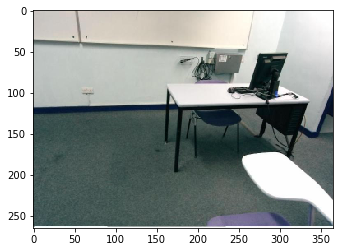

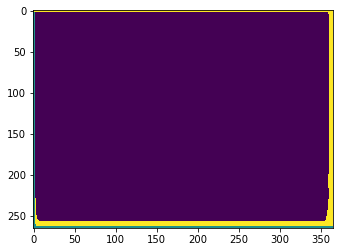

epoch :  1
epoch :  2
loss :  4.52755e-07


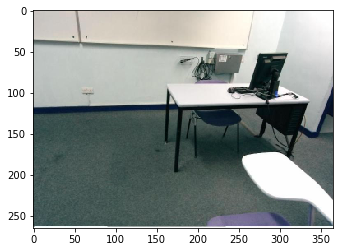

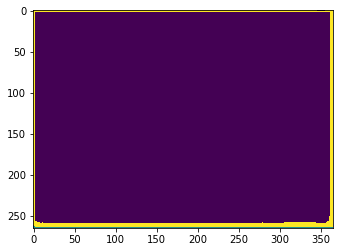

epoch :  3


KeyboardInterrupt: 

In [24]:
print("Learning start")
sess=tf.Session()
sess.run(tf.global_variables_initializer())


for epoch in range(training_epochs):
    a=0
    if len(train_image)%batch_size==0 : 
        total_batch = int(len(train_image)/batch_size)
    else:
        total_batch = int(len(train_image)/batch_size)+1
    print("epoch : ",epoch)
    for i in range(total_batch):

        if a+batch_size>len(train_image):
            batch_xs=train_image[a:]
            batch_ys=new_train_label[a:]
        else:
            batch_xs=train_image[a:a+batch_size]
            batch_ys=new_train_label[a:a+batch_size]
        feed_dict={x:batch_xs, y:batch_ys}
        img,l,_=sess.run([image,cost,optimizer], feed_dict=feed_dict)

        a=a+batch_size
    
    if epoch %2 ==0:
        print("loss : ", l)
        plt.imshow(batch_xs[0])
        plt.show()
        im1=np.minimum(img[0]*20,255)
        plt.imshow(im1)
        plt.show()

In [ ]:
img=sess.run([image],feed_dict={x:test_image, y:new_test_label})


In [1]:
cor_pre=tf.equal(tf.arg_max(output,1),tf.arg_max(y,1))
acc_=tf.reduce_mean(tf.cast(cor_pre,tf.float32))
feed_dict={x1:test_image, y:test_label, keep_conv:0.8, keep_hidden:0.5}
test_acc=sess.run(acc_,feed_dict=feed_dict)
print("accuracy : ", test_acc)

NameError: name 'tf' is not defined